<a href="https://colab.research.google.com/github/Sarik123-long/Credit-Card-Fraud-Detection---ML/blob/main/Credit_Card_Fraud_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0005037783375314861
Fraud Cases: 2
Valid Transactions: 3970


In [4]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,2.000000
mean,264.500000
std,374.059487
min,0.000000
25%,132.250000
50%,264.500000
75%,396.750000
max,529.000000


In [6]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,3970.000000
mean,64.899597
std,213.612570
min,0.000000
25%,2.270000
50%,12.990000
75%,54.990000
max,7712.430000


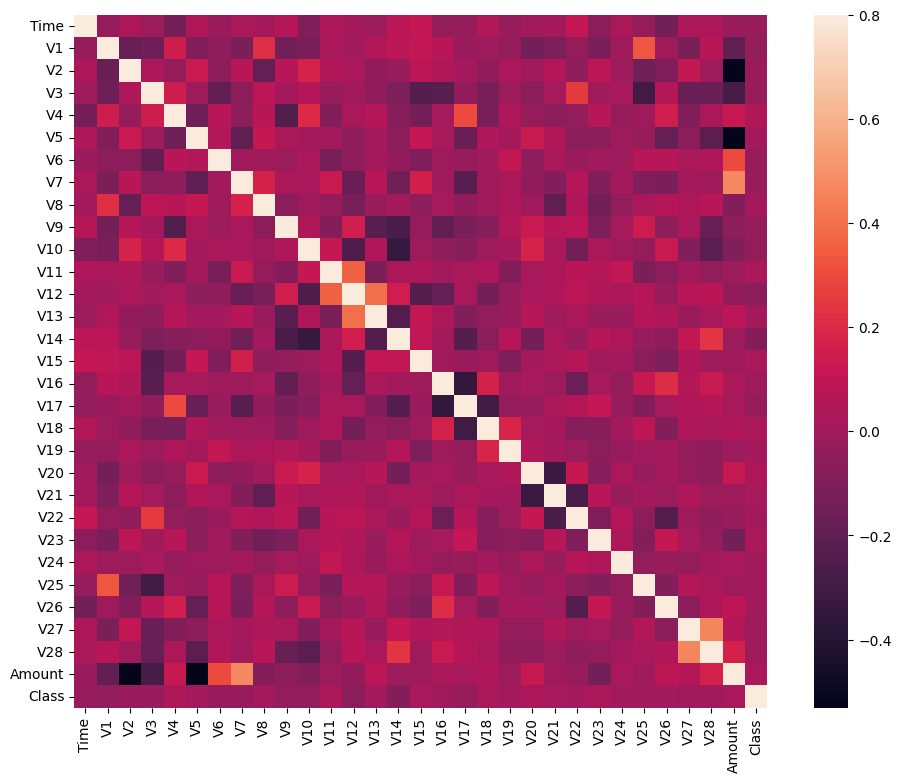

In [7]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [10]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]

# Drop rows with NaN in Y
not_nan_mask = Y.notna()
X = X[not_nan_mask]
Y = Y[not_nan_mask]


print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(3972, 30)
(3972,)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

print("Accuracy:", accuracy_score(yTest, yPred))
print("Classification Report:\n", classification_report(yTest, yPred))

# Save the trained model
joblib.dump(rfc, "fraud_model.pkl")

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       795

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795



['fraud_model.pkl']

In [18]:
import joblib

# Load the trained model
rfc = joblib.load("fraud_model.pkl")

In [19]:
import gradio as gr
import joblib
import numpy as np

# Load the trained model
rfc = joblib.load("fraud_model.pkl")

def predict_fraud(time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount):
    # Create a numpy array from the input values, including time
    features = np.array([[time, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, amount]])
    # Predict the class
    prediction = rfc.predict(features)
    # Return the prediction
    if prediction[0] == 1:
        return "Fraudulent Transaction"
    else:
        return "Valid Transaction"

# Create Gradio interface
inputs = [
    gr.Number(label="Time"),
    gr.Number(label="V1"), gr.Number(label="V2"), gr.Number(label="V3"), gr.Number(label="V4"),
    gr.Number(label="V5"), gr.Number(label="V6"), gr.Number(label="V7"), gr.Number(label="V8"),
    gr.Number(label="V9"), gr.Number(label="V10"), gr.Number(label="V11"), gr.Number(label="V12"),
    gr.Number(label="V13"), gr.Number(label="V14"), gr.Number(label="V15"), gr.Number(label="V16"),
    gr.Number(label="V17"), gr.Number(label="V18"), gr.Number(label="V19"), gr.Number(label="V20"),
    gr.Number(label="V21"), gr.Number(label="V22"), gr.Number(label="V23"), gr.Number(label="V24"),
    gr.Number(label="V25"), gr.Number(label="V26"), gr.Number(label="V27"), gr.Number(label="V28"),
    gr.Number(label="Amount")
]

output = gr.Textbox(label="Prediction")

gr.Interface(fn=predict_fraud, inputs=inputs, outputs=output).launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3c6596d47c820d7b31.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
